# Imports

In [20]:
from nb_utils import set_root
PROJECT_DIR = set_root(2)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import clear_output, display

#.loc[[4, 59, 26,  5, 70, 33]]

# Parameters

In [22]:
path_data = PROJECT_DIR / 'data'
path_intermediate = path_data / "02_intermediate"

file_path_tracker = path_intermediate / 'tracker.csv'
file_path_horm = path_intermediate / "data_horm_concat.csv"

# Read

In [23]:
data_tracker = pd.read_csv(file_path_tracker)
data_horm = pd.read_csv(file_path_horm)

In [24]:
data_horm["ID"] = data_horm["ID"].astype(int)
data_horm = data_horm.set_index("ID")

# Create center point

In [25]:
data_tracker["x_center"] = (data_tracker['x_min'] + data_tracker['x_max']) / 2
data_tracker["y_center"] = (data_tracker['y_min'] + data_tracker['y_max']) / 2

# Viz

In [26]:
print("coeficiente de variação: ")
(data_tracker["x_center"] * data_tracker["y_center"]).var() / (data_tracker["x_center"] * data_tracker["y_center"]).mean()

coeficiente de variação: 


247979.6198880209

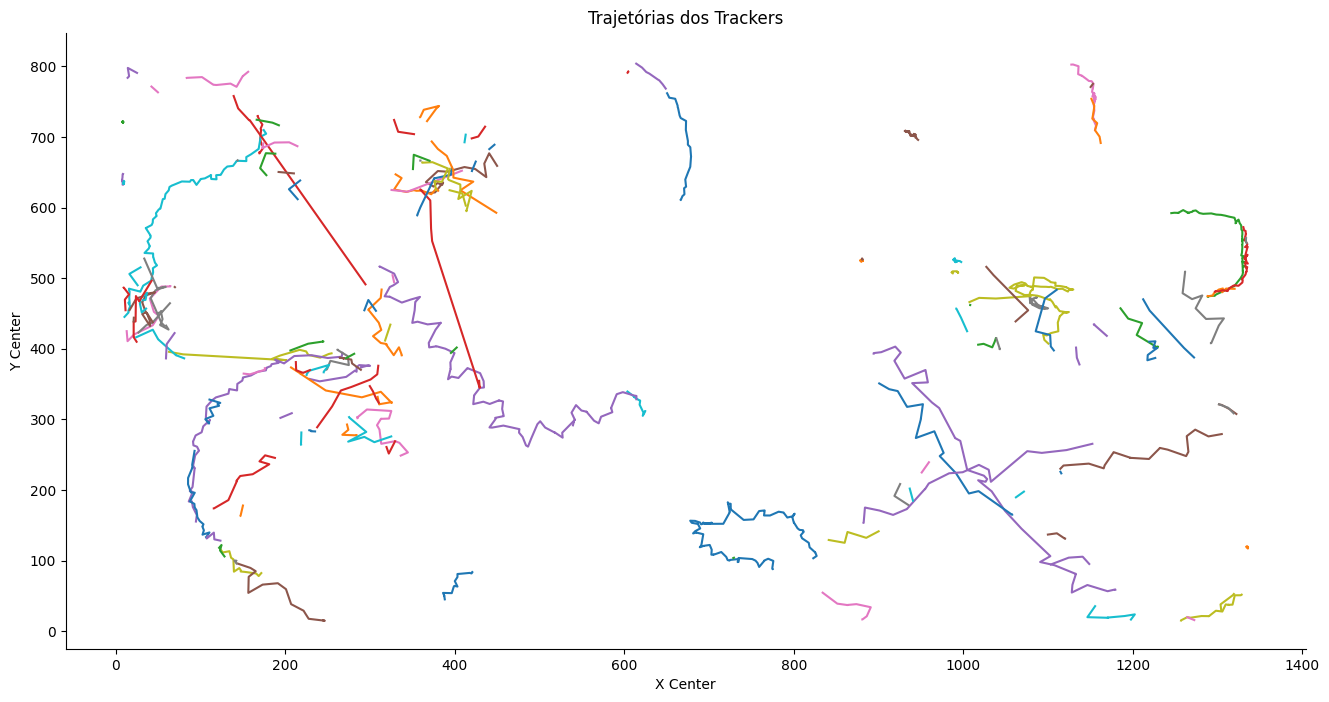

In [61]:
unique_tracker_ids = data_tracker['tracker_id'].unique()#[:10]  # Seleciona até 10 tracker_ids únicos
# [4, 59, 26,  5, 70, 33]
# Cria a figura e os eixos
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for id_tracker in unique_tracker_ids:
    data_tracker_id = data_tracker[data_tracker['tracker_id'] == id_tracker]
    ax.plot(data_tracker_id['x_center'], data_tracker_id['y_center'], label=f'Tracker ID: {id_tracker}')

# Configurações do gráfico
ax.set_title('Trajetórias dos Trackers')
ax.set_xlabel('X Center')
ax.set_ylabel('Y Center')
ax.spines[["top", "right"]].set_visible(False)
#ax.legend()  # Adiciona a legenda
plt.show()

In [88]:
def plot_all_classes():
    fig = go.Figure()
    classes = data_tracker['tracker_id'].unique()
    
    for classe in classes:
        filtered_df = data_tracker[data_tracker['tracker_id'] == classe]
        fig.add_trace(go.Scatter(
            x=filtered_df['x_center'],
            y=filtered_df['y_center'],
            mode='lines+markers',
            marker=dict(size=10),
            name=f'Classe {classe}'
        ))
    
    fig.update_layout(
        title='Scatter Plot de todos as trackers',
        xaxis_title='Eixo X',
        yaxis_title='Eixo Y',
        showlegend=True,
        height=600  # Aumenta a altura do gráfico
    )
    fig.show()

# Chama a função para plotar todas as classes
plot_all_classes()

In [82]:
# Widget dropdown para selecionar a classe
classe_dropdown = widgets.Dropdown(
    options=data_tracker['tracker_id'].unique(),
    description='Classe:'
)

# Função para gerar o scatter plot com base na classe selecionada
def plot_scatter(classe):
    clear_output(wait=True)  # Limpa a saída antes de gerar um novo gráfico
    display(classe_dropdown)  # Redesenha o dropdown
    filtered_df = data_tracker[data_tracker['tracker_id'] == classe]
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=filtered_df['x_center'],
        y=filtered_df['y_center'],
        mode='lines+markers',
        marker=dict(size=10),
        name=f'Classe {classe}'
    ))
    fig.update_layout(
        title=f'Scatter Plot para Classe {classe}',
        xaxis_title='Eixo X',
        yaxis_title='Eixo Y',
        showlegend=True,
        height=600
    )
    fig.show()

# Exibe o dropdown e inicializa a interação
display(classe_dropdown)
classe_dropdown.observe(lambda change: plot_scatter(change['new']), names='value')

Dropdown(description='Classe:', index=15, options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, …

# Viz horms

In [57]:
from sklearn.decomposition import PCA

# Supondo que data_horm seja um DataFrame do pandas
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_horm)

# Obtendo os coeficientes dos componentes principais
loadings = pca.components_

# Crie um DataFrame para facilitar a visualização
loadings_df = pd.DataFrame(loadings.T, columns=['PC1', 'PC2'], index=data_horm.columns)


loadings_df.sort_values(["PC1", "PC2"], ascending=False).head(10)

,PC1,PC2
Total sperm count,0.832561,-0.386495
Seminal AMH,0.366711,0.858047
Serum inhibin B,0.292902,0.131404
Sperm conc,0.275768,-0.132872
Sperm C22:6 n-3,0.061164,-0.036636
Immotile sperm,0.026710,0.172480
Sperm C16:0,0.021172,-0.008212
Serum AMH,0.017278,0.109538
Sperm vitality,0.012370,-0.041690
Age,0.011072,0.009630


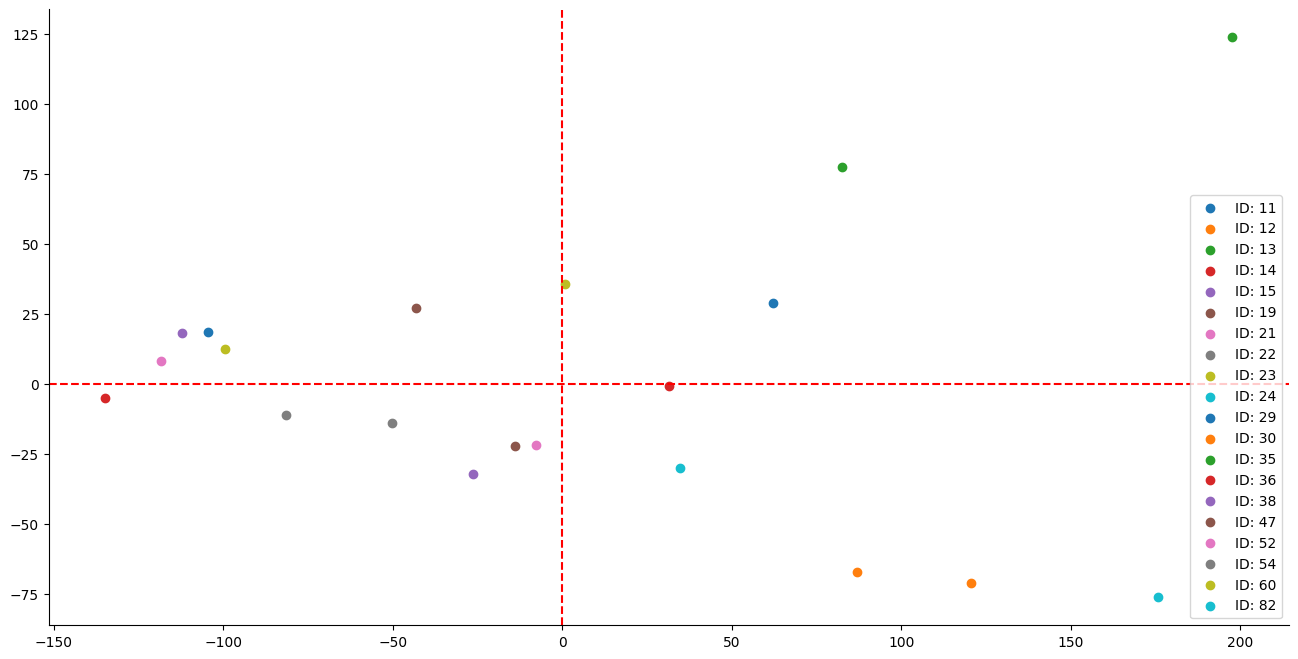

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
for idx, index in enumerate(data_horm.index):
    ax.scatter(X_pca[idx, 0], X_pca[idx, 1], label=f'ID: {index}')
ax.legend()
ax.axhline(0, color="red", linestyle="--")
ax.axvline(0, color="red", linestyle="--")
ax.spines[["top", "right"]].set_visible(False)

In [58]:
data_horm.loc[[35, 82], ["Total sperm count", "Seminal AMH"]]

,Total sperm count,Seminal AMH
ID,,
35,255.2,229
82,157.3,7
